# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
!pip install palmerpenguins
!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

data = load_penguins()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [3]:
# print unique values of categorical columns
for col in ['species', 'island', 'sex', 'year']:
  print(f'{col} = {data[col].unique()}')

species = ['Adelie' 'Gentoo' 'Chinstrap']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['male' 'female' nan]
year = [2007 2008 2009]


In [4]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальные колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.


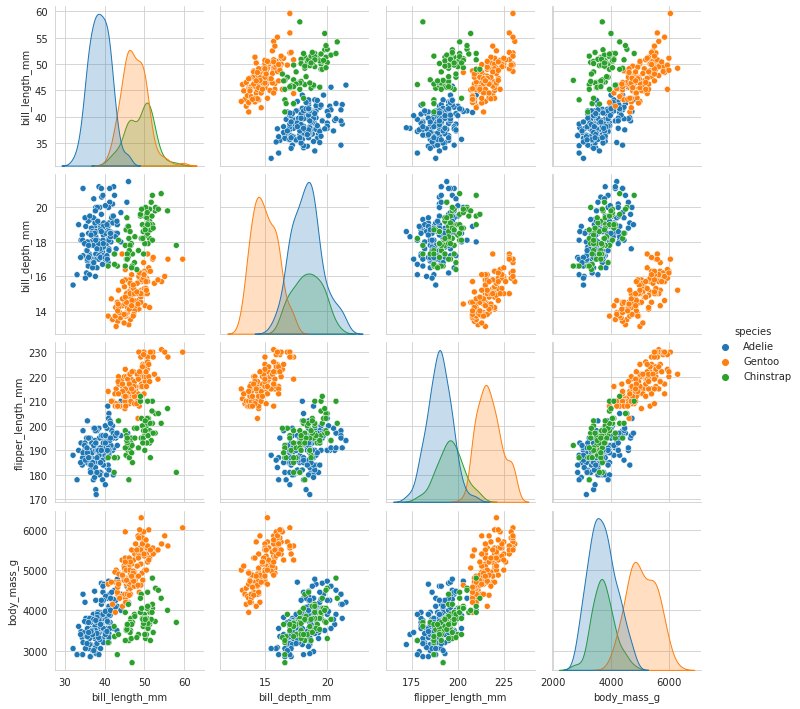

In [5]:
sns.pairplot(data.drop(columns='year'), hue='species')
plt.show()

In [6]:
# delete rows with nan
data.dropna(inplace=True)

# split data into features (X) and targets (y)
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# create and train classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# get predictions for test data
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.77      0.83      0.80        65
   Chinstrap       0.67      0.43      0.52        28
      Gentoo       0.85      0.95      0.90        41

    accuracy                           0.78       134
   macro avg       0.76      0.74      0.74       134
weighted avg       0.77      0.78      0.77       134



1.2. То же самое с использованием кросс-валидации


In [7]:
# cross validate classifier with given scroing metrics
scores = cross_validate(KNeighborsClassifier(), X, y, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'), cv=5)

# calculate mean score values over all folds
for key, value in scores.items():
  scores[key] = value.mean()

# print mean scores
print(pd.Series(scores).to_markdown())

|                      |          0 |
|:---------------------|-----------:|
| fit_time             | 0.00332417 |
| score_time           | 0.00831079 |
| test_accuracy        | 0.790231   |
| test_precision_macro | 0.781227   |
| test_recall_macro    | 0.733672   |
| test_f1_macro        | 0.736367   |


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)


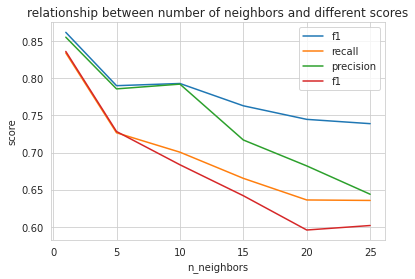

In [8]:
n_neighbors = [1, 5, 10, 15, 20, 25]
param_grid = {
    'n_neighbors': n_neighbors
}

# create and train grid search
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=['accuracy', 'recall_macro', 'precision_macro', 'f1_macro'], refit='recall_macro')
gs.fit(X, y)
results = gs.cv_results_

plt.plot(n_neighbors, results['mean_test_accuracy'], label='f1')
plt.plot(n_neighbors, results['mean_test_recall_macro'], label='recall')
plt.plot(n_neighbors, results['mean_test_precision_macro'], label='precision')
plt.plot(n_neighbors, results['mean_test_f1_macro'], label='f1')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('relationship between number of neighbors and different scores')
plt.show()




1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

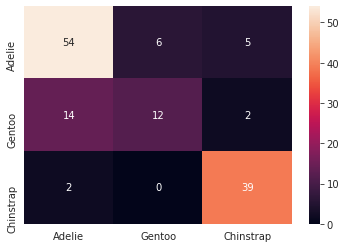

In [9]:
species = data['species'].unique()
confusion_scores = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion_scores, columns=list(species), index=list(species))
sns.heatmap(confusion_df, annot=True)
plt.show()

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


In [10]:
data = load_penguins()

# delete rows with nan
data.dropna(inplace=True)

# binarize data leaving only two species
data = data[data['species'].isin(['Adelie', 'Gentoo'])]

# split data into features (X) and targets (y)
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# create and train classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# get predictions for test data
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        59
      Gentoo       0.94      0.94      0.94        47

    accuracy                           0.94       106
   macro avg       0.94      0.94      0.94       106
weighted avg       0.94      0.94      0.94       106




**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

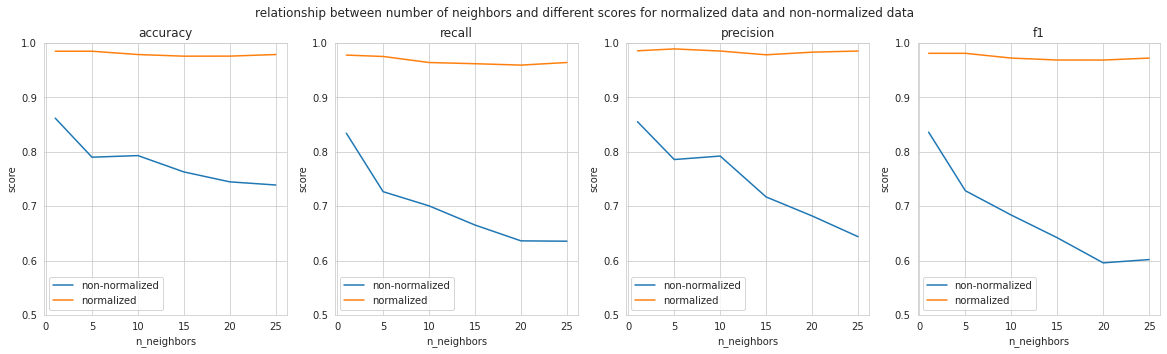

In [11]:
data = load_penguins()

# delete rows with nan
data.dropna(inplace=True)

# split data into features (X) and targets (y)
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# create normalized copy of features (normalized_X)
normalized_X = X.copy()
normalized_X.loc[::] = MinMaxScaler().fit_transform(X)

n_neighbors = [1, 5, 10, 15, 20, 25]
param_grid = {
    'n_neighbors': n_neighbors
}
scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']

# create and train grid search for non-normalized data
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=scoring, refit='recall_macro')
gs.fit(X, y)

# get results from grid search for non-normalized data
results = gs.cv_results_

# create and train grid search for normalized data
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=scoring, refit='recall_macro')
gs.fit(normalized_X, y)

# get results from grid search for normalized data
normalized_results = gs.cv_results_

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.plot(n_neighbors, results['mean_test_accuracy'], label='non-normalized')
ax1.plot(n_neighbors, normalized_results['mean_test_accuracy'], label='normalized')
ax1.set_title('accuracy')
ax1.legend()
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('score')
ax1.set_ylim([.5, 1])

ax2.plot(n_neighbors, results['mean_test_recall_macro'], label='non-normalized')
ax2.plot(n_neighbors, normalized_results['mean_test_recall_macro'], label='normalized')
ax2.set_title('recall')
ax2.legend()
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('score')
ax2.set_ylim([.5, 1])

ax3.plot(n_neighbors, results['mean_test_precision_macro'], label='non-normalized')
ax3.plot(n_neighbors, normalized_results['mean_test_precision_macro'], label='normalized')
ax3.set_title('precision')
ax3.legend()
ax3.set_xlabel('n_neighbors')
ax3.set_ylabel('score')
ax3.set_ylim([.5, 1])

ax4.plot(n_neighbors, results['mean_test_f1_macro'], label='non-normalized')
ax4.plot(n_neighbors, normalized_results['mean_test_f1_macro'], label='normalized')
ax4.set_title('f1')
ax4.legend()
ax4.set_xlabel('n_neighbors')
ax4.set_ylabel('score')
ax4.set_ylim([.5, 1])

fig.suptitle('relationship between number of neighbors and different scores for normalized data and non-normalized data')
plt.show()

Таким образом, можно сделать вывод, что результуты лучше в случае с нормализоваными данными, чем с ненормализованными.